# Quick Exploration Data Analysis

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Validation dataset

In [2]:
VALIDATION_IMAGES_PATH = Path(".").resolve().parent / "input" / "validation"
VALIDATION_ANNOTATIONS_CSV_PATH = Path(".").resolve().parent / "input" / "validation-annotations-bbox.csv"
VALIDATION_CONFIDENCE_CSV_PATH = Path(".").resolve().parent / "input" / "validation-annotations-human-imagelabels-boxable.csv"
VALIDATION_IMGINFO_CSV_PATH = Path(".").resolve().parent / "input" / "validation-images-with-rotation.csv"
LABELS_DESCRIPTION_CSV_PATH = Path(".").resolve().parent / "input" / "class-descriptions-boxable.csv"

In [3]:
VALIDATION_ANNOTATIONS = pd.read_csv(VALIDATION_ANNOTATIONS_CSV_PATH, index_col="ImageID")
LABELS_DESCRIPTION = pd.read_csv(LABELS_DESCRIPTION_CSV_PATH, header=None)
VALIDATION_ANNOTATIONS['LabelName'] = VALIDATION_ANNOTATIONS['LabelName'].map(LABELS_DESCRIPTION.set_index(0)[1])

VALIDATION_ANNOTATIONS.head()

,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
ImageID,,,,,,,,,,,,
0001eeaf4aed83f9,freeform,Airplane,1,0.022464,0.964178,0.070656,0.800164,0,0,0,0,0
000595fe6fee6369,freeform,Food,1,0.000000,1.000000,0.000233,1.000000,0,0,1,0,0
000595fe6fee6369,freeform,Fruit,1,0.141030,0.180277,0.676262,0.732455,0,0,0,0,0
000595fe6fee6369,freeform,Fruit,1,0.213781,0.253028,0.298764,0.354956,1,0,0,0,0
000595fe6fee6369,freeform,Fruit,1,0.232926,0.288447,0.488954,0.545146,1,0,0,0,0


In [4]:
VALIDATION_ANNOTATIONS.index.unique().shape

(35925,)

In [5]:
from PIL import Image
# !pip3 install --upgrade git+https://github.com/vfdev-5/ImageDatasetViz
from image_dataset_viz import render_datapoint, bbox_to_points

In [6]:
xyxy_cols = ['XMin', 'YMin', 'XMax', 'YMax']


def get_val_bboxes_labels(canvas_size, image_id):
    bboxes = VALIDATION_ANNOTATIONS.loc[image_id, xyxy_cols].values
    labels = VALIDATION_ANNOTATIONS.loc[image_id, 'LabelName']
    if bboxes.ndim == 1:
        bboxes = bboxes[None, :]
    
    if isinstance(labels, str):        
        labels = np.array([labels, ])
    bboxes[:, 0] *= canvas_size[0]
    bboxes[:, 2] *= canvas_size[0]    
    bboxes[:, 1] *= canvas_size[1]
    bboxes[:, 3] *= canvas_size[1]
    return bboxes, labels
    

In [7]:
val_image_ids = VALIDATION_ANNOTATIONS.index.unique()

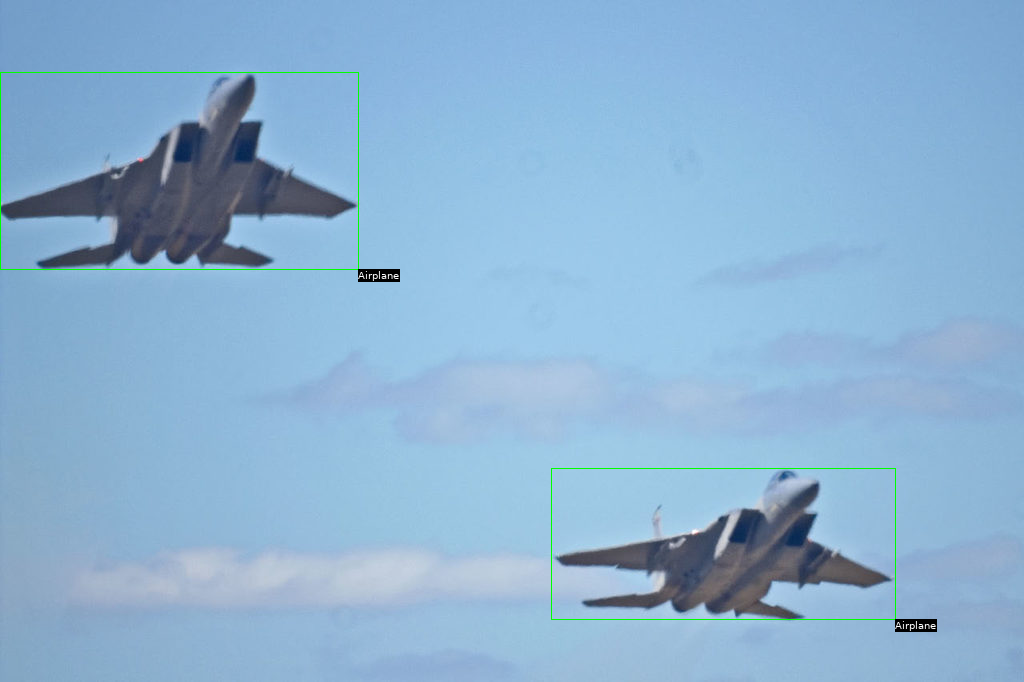

In [8]:
image_id = val_image_ids[23]

img = Image.open(VALIDATION_IMAGES_PATH / "{}.jpg".format(image_id))
if img.mode == "L":
    img = img.convert('RGB')
targets = [(bbox_to_points(b), l) for b, l in zip(*get_val_bboxes_labels(img.size, image_id))]
render_datapoint(img, targets)

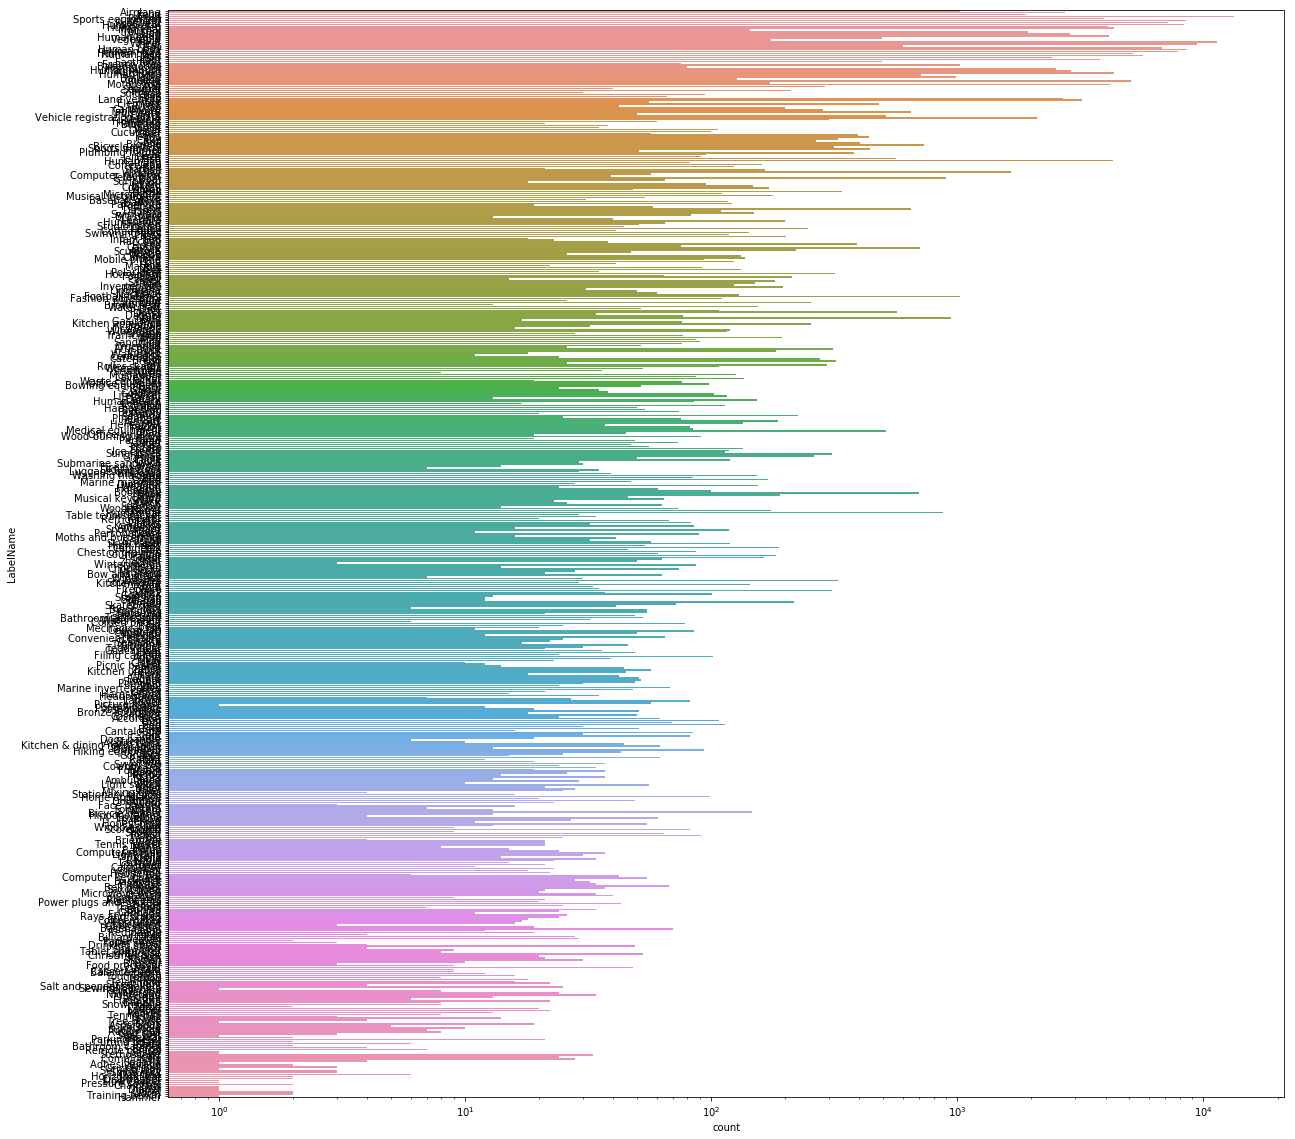

In [10]:
plt.figure(figsize=(20, 20))
sns.countplot(y='LabelName', data=VALIDATION_ANNOTATIONS)
plt.xscale('log')

In [27]:
label_counts = VALIDATION_ANNOTATIONS['LabelName'].value_counts()
label_counts[label_counts < 10].index.values.tolist()

['Scoreboard',
 'Cassette deck',
 'Mixer',
 'Plastic bag',
 'Tablet computer',
 'Balance beam',
 'Shower',
 'Isopod',
 'Tennis ball',
 'Banjo',
 'Wardrobe',
 'Squid',
 'Turtle',
 'Golf cart',
 'Snowmobile',
 'Lighthouse',
 'Towel',
 'Wine rack',
 'Remote control',
 'Sombrero',
 'Treadmill',
 'Rugby ball',
 'Digital clock',
 'Stretcher',
 'Bat',
 'Oboe',
 'Flashlight',
 'Binoculars',
 'Horizontal bar',
 'Corded phone',
 'Scale',
 'Envelope',
 'Spatula',
 'Stationary bicycle',
 'Barge',
 'Drinking straw',
 'Tree house',
 'Fax',
 'Briefcase',
 'Salt and pepper shakers',
 'Snowman',
 'Cake stand',
 'Food processor',
 'Seat belt',
 'Toilet paper',
 'Dog bed',
 'Cricket ball',
 'Face powder',
 'Winter melon',
 'Spice rack',
 'Skunk',
 'Chainsaw',
 'Bathroom cabinet',
 'Dishwasher',
 'Worm',
 'Unicycle',
 'Parking meter',
 'Torch',
 'Cutting board',
 'Training bench',
 'Willow',
 'Paper towel',
 'Adhesive tape',
 'Slow cooker',
 'Toaster',
 'Diaper',
 'Pencil case',
 'Screwdriver',
 'Serving 

Labels from validation dataset

In [9]:
validation_labels = VALIDATION_ANNOTATIONS['LabelName'].unique()
len(validation_labels), validation_labels[:10]

(559, array(['Airplane', 'Food', 'Fruit', 'Person', 'Sports equipment',
        'Clothing', 'Footwear', 'Human arm', 'Human leg', 'Mammal'],
       dtype=object))

Number of images with confidence == 1

In [74]:
VALIDATION_ANNOTATIONS['Confidence'].value_counts()

1    204621
Name: Confidence, dtype: int64

In [76]:
VALIDATION_CONFIDENCE = pd.read_csv(VALIDATION_CONFIDENCE_CSV_PATH, index_col="ImageID")
VALIDATION_CONFIDENCE.head()

,Source,LabelName,Confidence
ImageID,,,
0001eeaf4aed83f9,verification,/m/0k5j,1
0001eeaf4aed83f9,verification,/m/07yv9,1
0001eeaf4aed83f9,verification,/m/0cmf2,1
0004886b7d043cfd,verification,/m/0463sg,0
0004886b7d043cfd,verification,/m/04hgtk,0


In [82]:
val_conf_image_ids = set(VALIDATION_CONFIDENCE.index.values)
val_image_ids = set(VALIDATION_ANNOTATIONS.index.values)

In [83]:
len(val_conf_image_ids), len(val_image_ids)

(39984, 35925)

In [84]:
confident_val_image_ids = set(VALIDATION_CONFIDENCE[VALIDATION_CONFIDENCE['Confidence'] == 1].index.values)
confident_val_image_ids &= val_image_ids

VALIDATION_ANNOTATIONS.loc[confident_val_image_ids, :].shape, VALIDATION_ANNOTATIONS.shape

((204621, 12), (204621, 12))

Image sizes:

In [10]:
# VALIDATION_IMGINFO = pd.read_csv(VALIDATION_IMGINFO_CSV_PATH)
# VALIDATION_IMGINFO.head()

In [18]:
val_image_sizes = []

for image_id in val_image_ids:
    img = Image.open(VALIDATION_IMAGES_PATH / "{}.jpg".format(image_id))
    val_image_sizes.append(img.size)

In [22]:
val_image_sizes = np.array(val_image_sizes)
val_image_sizes.shape

(35925, 2)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


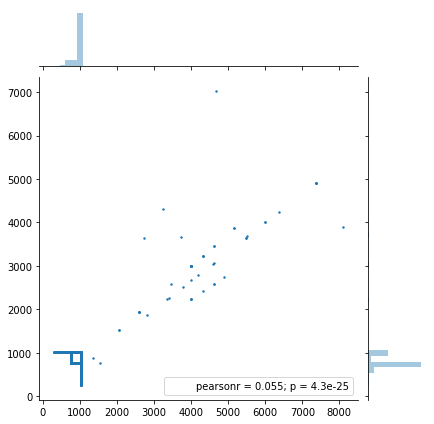

In [30]:
sns.jointplot(x=val_image_sizes[:, 0], y=val_image_sizes[:, 1], size=6, s=2)

## Test dataset

In [9]:
TEST_IMAGES_PATH = Path(".").resolve().parent / "input" / "test"
TEST_ANNOTATIONS_CSV_PATH = Path(".").resolve().parent / "input" / "test-annotations-bbox.csv"
TEST_CONFIDENCE_CSV_PATH = Path(".").resolve().parent / "input" / "test-annotations-human-imagelabels-boxable.csv"

LABELS_DESCRIPTION_CSV_PATH = Path(".").resolve().parent / "input" / "class-descriptions-boxable.csv"

In [10]:
TEST_ANNOTATIONS = pd.read_csv(TEST_ANNOTATIONS_CSV_PATH, index_col="ImageID")
LABELS_DESCRIPTION = pd.read_csv(LABELS_DESCRIPTION_CSV_PATH, header=None)
TEST_ANNOTATIONS['LabelName'] = TEST_ANNOTATIONS['LabelName'].map(LABELS_DESCRIPTION.set_index(0)[1])

TEST_ANNOTATIONS.head()

,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
ImageID,,,,,,,,,,,,
000026e7ee790996,freeform,Tree,1,0.071905,0.145346,0.206591,0.391306,0,1,1,0,0
000026e7ee790996,freeform,Tree,1,0.439756,0.572466,0.264153,0.435122,0,1,1,0,0
000026e7ee790996,freeform,Tree,1,0.668455,1.000000,0.000000,0.552825,0,1,1,0,0
000062a39995e348,freeform,Bird,1,0.205719,0.849912,0.154144,1.000000,0,0,0,0,0
000062a39995e348,freeform,Plant,1,0.137133,0.377634,0.000000,0.884185,1,1,0,0,0


In [11]:
TEST_ANNOTATIONS.index.unique().shape

(108159,)

In [12]:
from PIL import Image
# !pip3 install --upgrade git+https://github.com/vfdev-5/ImageDatasetViz
from image_dataset_viz import render_datapoint, bbox_to_points

In [13]:
xyxy_cols = ['XMin', 'YMin', 'XMax', 'YMax']


def get_test_bboxes_labels(canvas_size, image_id):
    bboxes = TEST_ANNOTATIONS.loc[image_id, xyxy_cols].values
    labels = TEST_ANNOTATIONS.loc[image_id, 'LabelName']
    if bboxes.ndim == 1:
        bboxes = bboxes[None, :]
    
    if isinstance(labels, str):        
        labels = np.array([labels, ])
    bboxes[:, 0] *= canvas_size[0]
    bboxes[:, 2] *= canvas_size[0]    
    bboxes[:, 1] *= canvas_size[1]
    bboxes[:, 3] *= canvas_size[1]
    return bboxes, labels
    

In [14]:
test_image_ids = TEST_ANNOTATIONS.index.unique()

In [15]:
images_with_only_isgroupof = [
    image_id for image_id in test_image_ids if (TEST_ANNOTATIONS.loc[image_id, 'IsGroupOf'] == 1).all()
]
len(images_with_only_isgroupof), len(test_image_ids)

(10527, 108159)

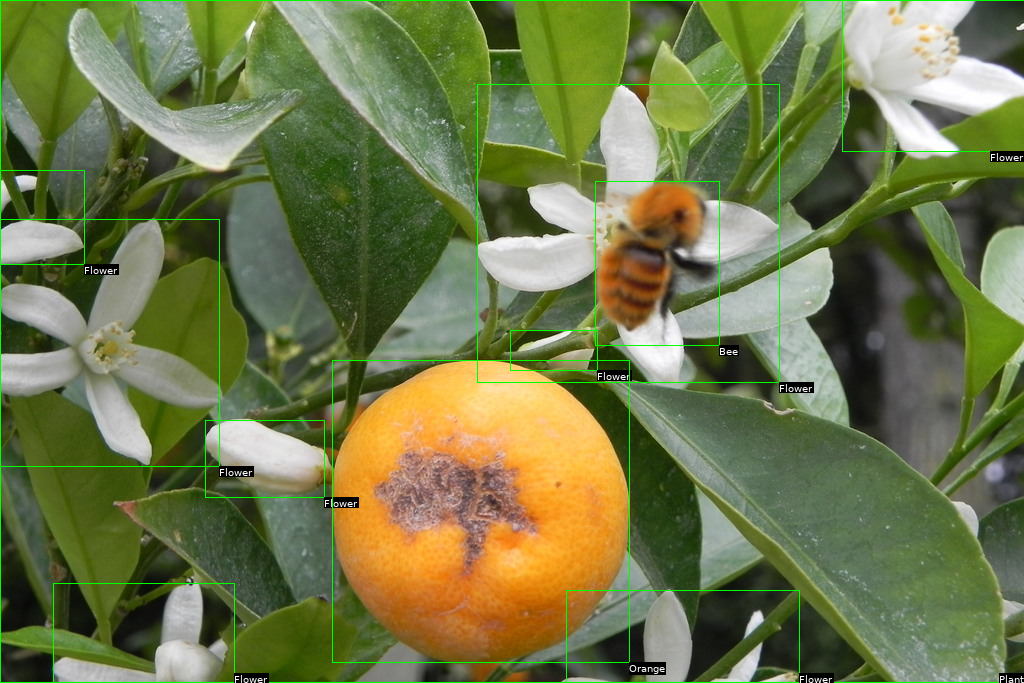

In [16]:
image_id = test_image_ids[24]


img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
if img.mode == "L":
    img = img.convert('RGB')
targets = [(bbox_to_points(b), l) for b, l in zip(*get_test_bboxes_labels(img.size, image_id))]
render_datapoint(img, targets)

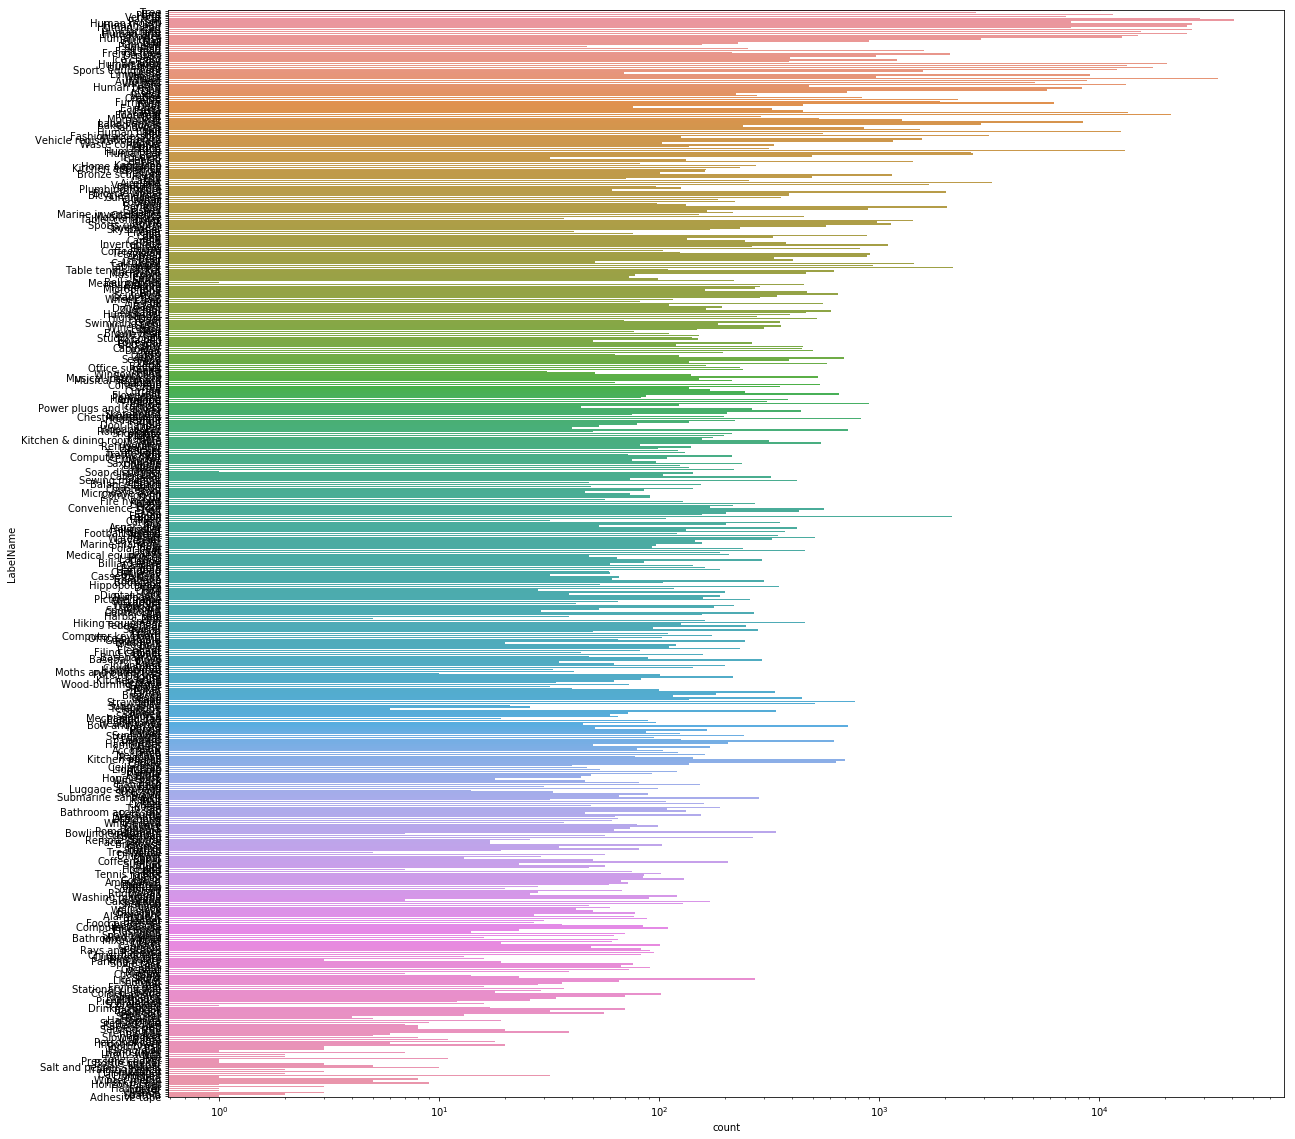

In [21]:
plt.figure(figsize=(20, 20))
sns.countplot(y='LabelName', data=TEST_ANNOTATIONS)
plt.xscale('log')

Labels from test dataset

In [66]:
test_labels = TEST_ANNOTATIONS['LabelName'].unique()
len(test_labels), test_labels[:10]

(576,
 array(['Tree', 'Bird', 'Plant', 'Vehicle', 'Car', 'Person', 'Human mouth',
        'Human hair', 'Human head', 'Girl'], dtype=object))

Image sizes:

In [42]:
test_image_sizes = []

for image_id in test_image_ids:
    img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
    test_image_sizes.append(img.size)

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:2514: DecompressionBombWarning: Image size (102539736 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [43]:
test_image_sizes = np.array(test_image_sizes)
test_image_sizes.shape

(108159, 2)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


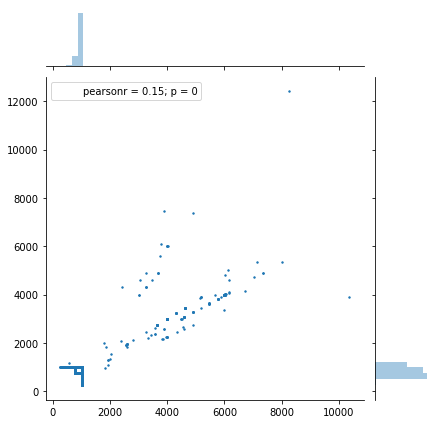

In [44]:
sns.jointplot(x=test_image_sizes[:, 0], y=test_image_sizes[:, 1], size=6, s=2)

In [49]:
np.where(test_image_sizes > 10000)[0]

array([15010, 45734])

In [52]:
image_id = test_image_ids[45734]

img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
img.size

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:2514: DecompressionBombWarning: Image size (102539736 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


(8268, 12402)

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:2514: DecompressionBombWarning: Image size (102539736 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


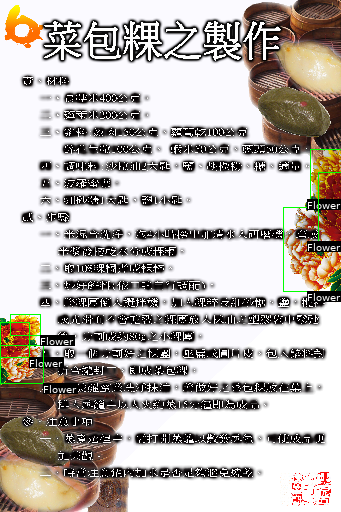

In [55]:
image_id = test_image_ids[45734]

img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
if img.mode == "L":
    img = img.convert('RGB')
targets = [(bbox_to_points(b), l) for b, l in zip(*get_test_bboxes_labels(img.size, image_id))]
render_datapoint(img, targets, output_size=(512, 512))

Check gt from train_overfit

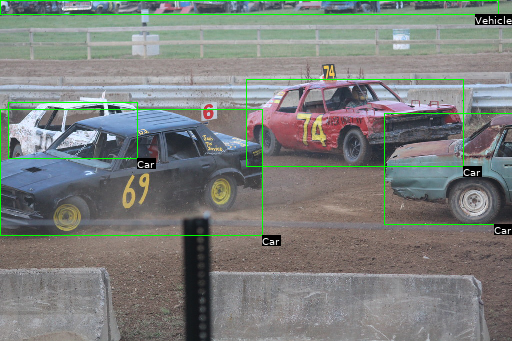

In [19]:
image_id = "0000c64e1253d68f"

img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
if img.mode == "L":
    img = img.convert('RGB')
targets = [(bbox_to_points(b), l) for b, l in zip(*get_test_bboxes_labels(img.size, image_id))]
render_datapoint(img, targets, output_size=(512, 512))

In [20]:
TEST_ANNOTATIONS.loc[image_id, :]

,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
ImageID,,,,,,,,,,,,
0000c64e1253d68f,freeform,Vehicle,1,0.000000,0.973850,0.000000,0.043342,0,1,1,0,0
0000c64e1253d68f,freeform,Car,1,0.000000,0.513534,0.321356,0.689661,0,1,0,0,0
0000c64e1253d68f,freeform,Car,1,0.016515,0.268228,0.299368,0.462906,1,0,0,0,0
0000c64e1253d68f,freeform,Car,1,0.481498,0.904376,0.232029,0.489017,1,0,0,0,0
0000c64e1253d68f,freeform,Car,1,0.751517,1.000000,0.332350,0.658053,0,1,0,0,0


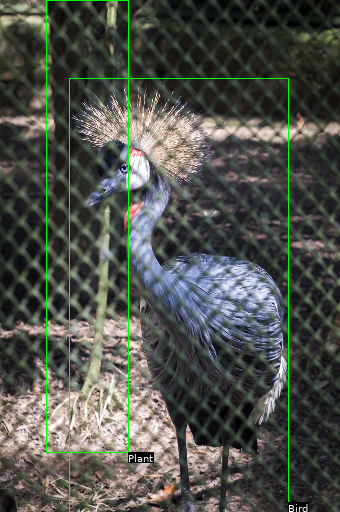

In [18]:
image_id = "000062a39995e348"

img = Image.open(TEST_IMAGES_PATH / "{}.jpg".format(image_id))
if img.mode == "L":
    img = img.convert('RGB')
targets = [(bbox_to_points(b), l) for b, l in zip(*get_test_bboxes_labels(img.size, image_id))]
render_datapoint(img, targets, output_size=(512, 512))